In [ ]:
# Notebook containing different forcasting models

Command executed successfully
Command executed successfully
Command executed successfully
Command executed successfully


/home/salman1567/code/Data Science - Machine Learning Projects/Data Science Portfolio/Eve_Online_PI_Price_Forecaster/notebooks/exploratory_data_analysis.ipynb:241: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  "      <td>397.6</td>\n",
/home/salman1567/code/Data Science - Machine Learning Projects/Data Science Portfolio/Eve_Online_PI_Price_Forecaster/notebooks/exploratory_data_analysis.ipynb:242: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  "      <td>778909.0</td>\n",
/home/salman1567/code/Data Science - Machine Learning Projects/Data Science Portfolio/Eve_Online_PI_Price_Forecaster/notebooks/exploratory_data_analysis.ipynb:243: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include date

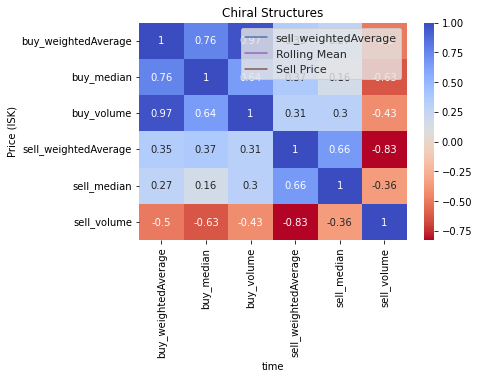

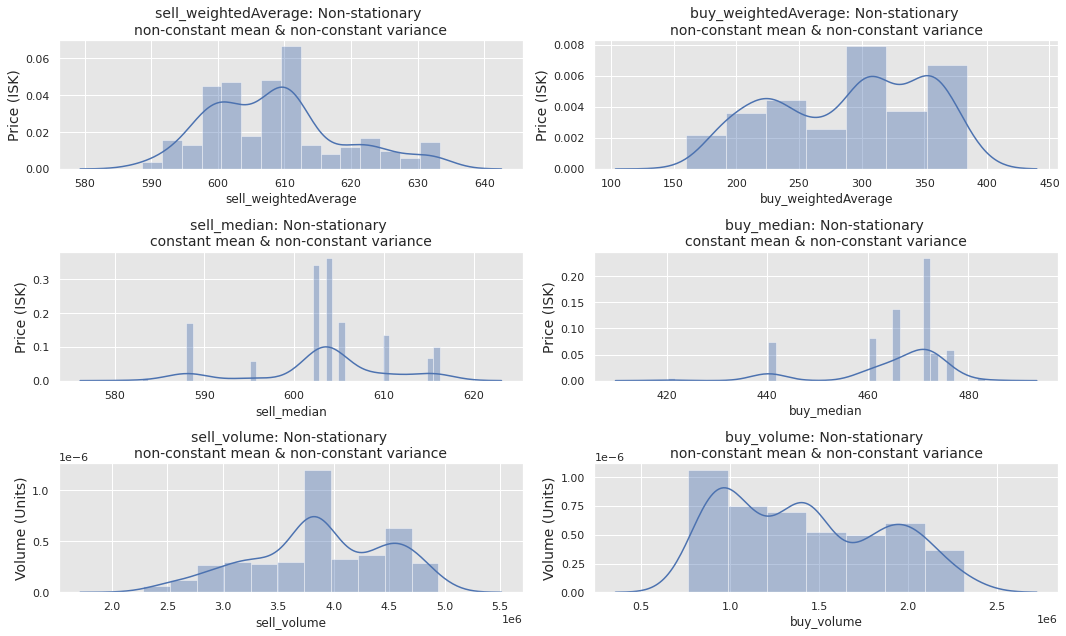

P-value: 0.20589200825339193
Critical Value: -2.870028369720798
Test Statistic: -2.2009743660984187


In [1]:
import pandas as pd
import numpy as np
from ipynb.fs.full.exploratory_data_analysis import create_item_plot

# Modeling

## 1. Naive Approach

## 2. Moving Average

## 3. ARIMA